# Máquina de Turing (MT)
---

## Extendiendo el poder de cómputo

* **Pregunta central en computación: ¿qué máquinas puedo construir? ¿qué límites tendrán?**

| Lenguajes                      | Máquina | Límite                        |
| --                             | --      | --                            |
| **Regulares**                  | AF      | $L = \{a^n b^n / n > 0\}$     |
| **Incontextuales**             | AP      | $L = \{a^n b^n c^n / n > 0\}$ |
| **Contextuales**               | ALA     | Autómata Linealmente Acotado, no se estudiará este autómata (pues puede verse como restricción de otro formalismo que es más potente aún...) |
| **Recursivamente Enumerables** | MT      | Máquina de Turing             |

## Alan Mathison Turing

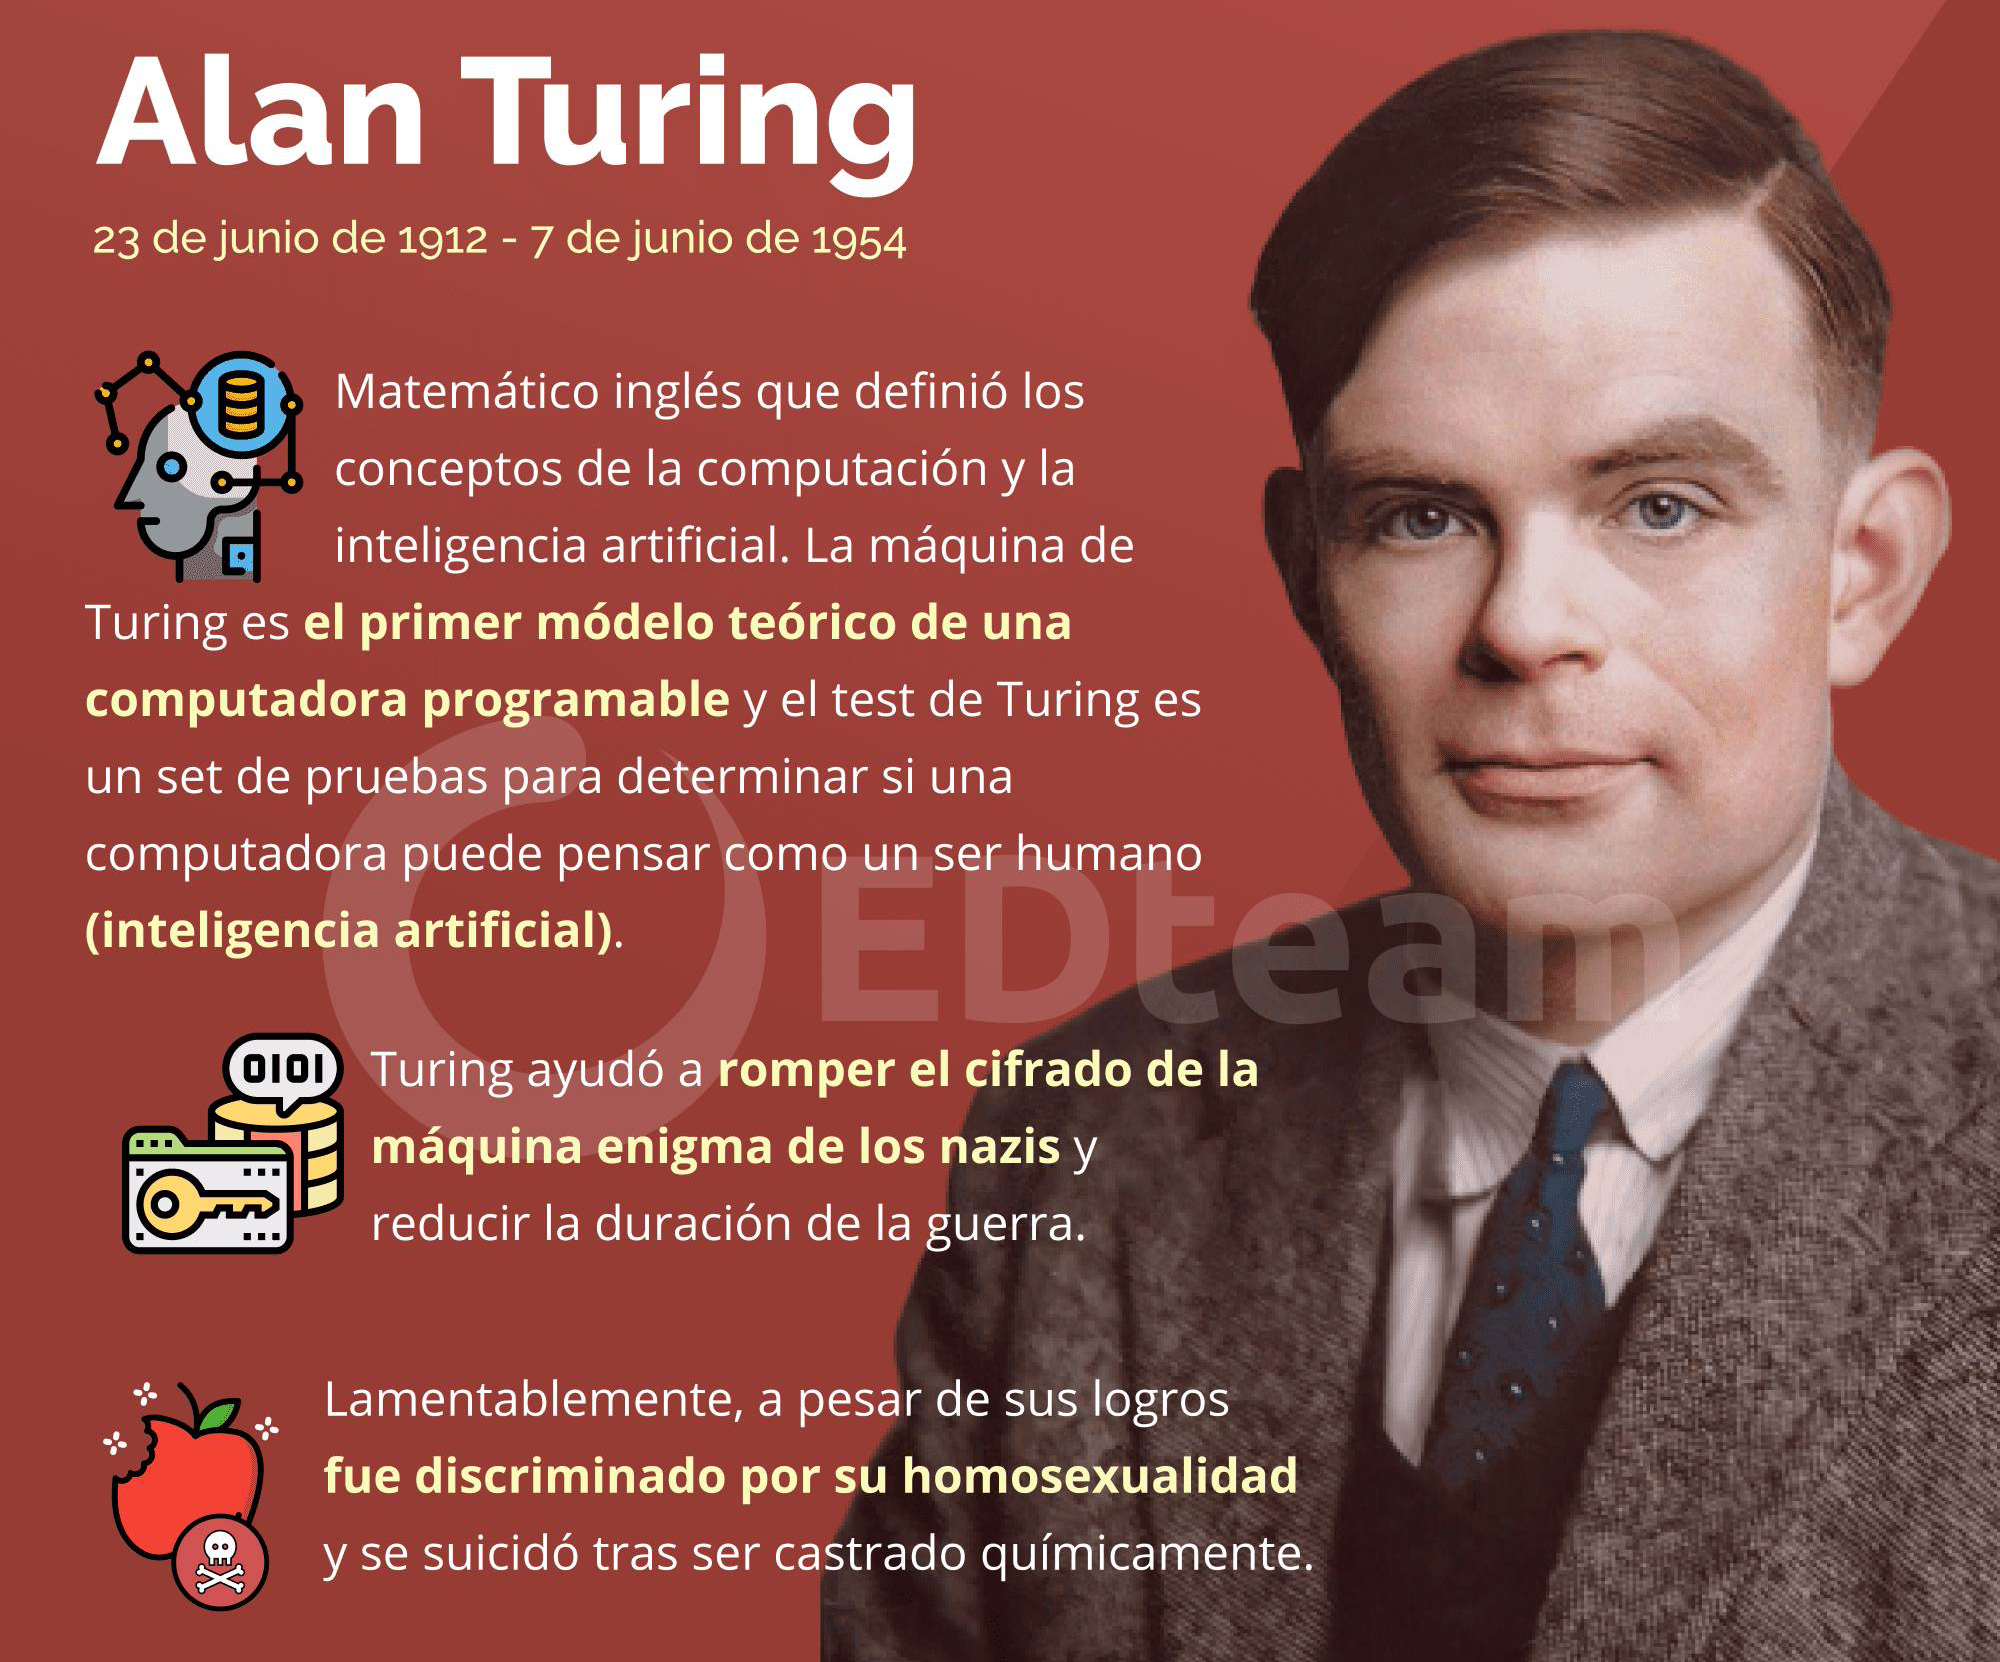

* Hitos de su carrera científica:
  * Diseño de una **máquina hipotética**, la Máquina de Turing, creando los conceptos teóricos que permitieron la construcción de las primeras computadoras
  * En 1936 escribió un artículo científico, titulado **"On computable numbers, with an application to the Entscheidungsproblem"**, en el que hizo una de las aportaciones científicas más importantes de su vida: la Máquina de Turing
  * Como **criptógrafo** se destacó por conseguir desvelar los códigos Enigma, con los que los alemanes cifraban sus mensajes durante la Segunda Guerra Mundial
  * Realizó investigaciones pioneras con las que sentó las bases de la **inteligencia artificial** y la **biología matemática**

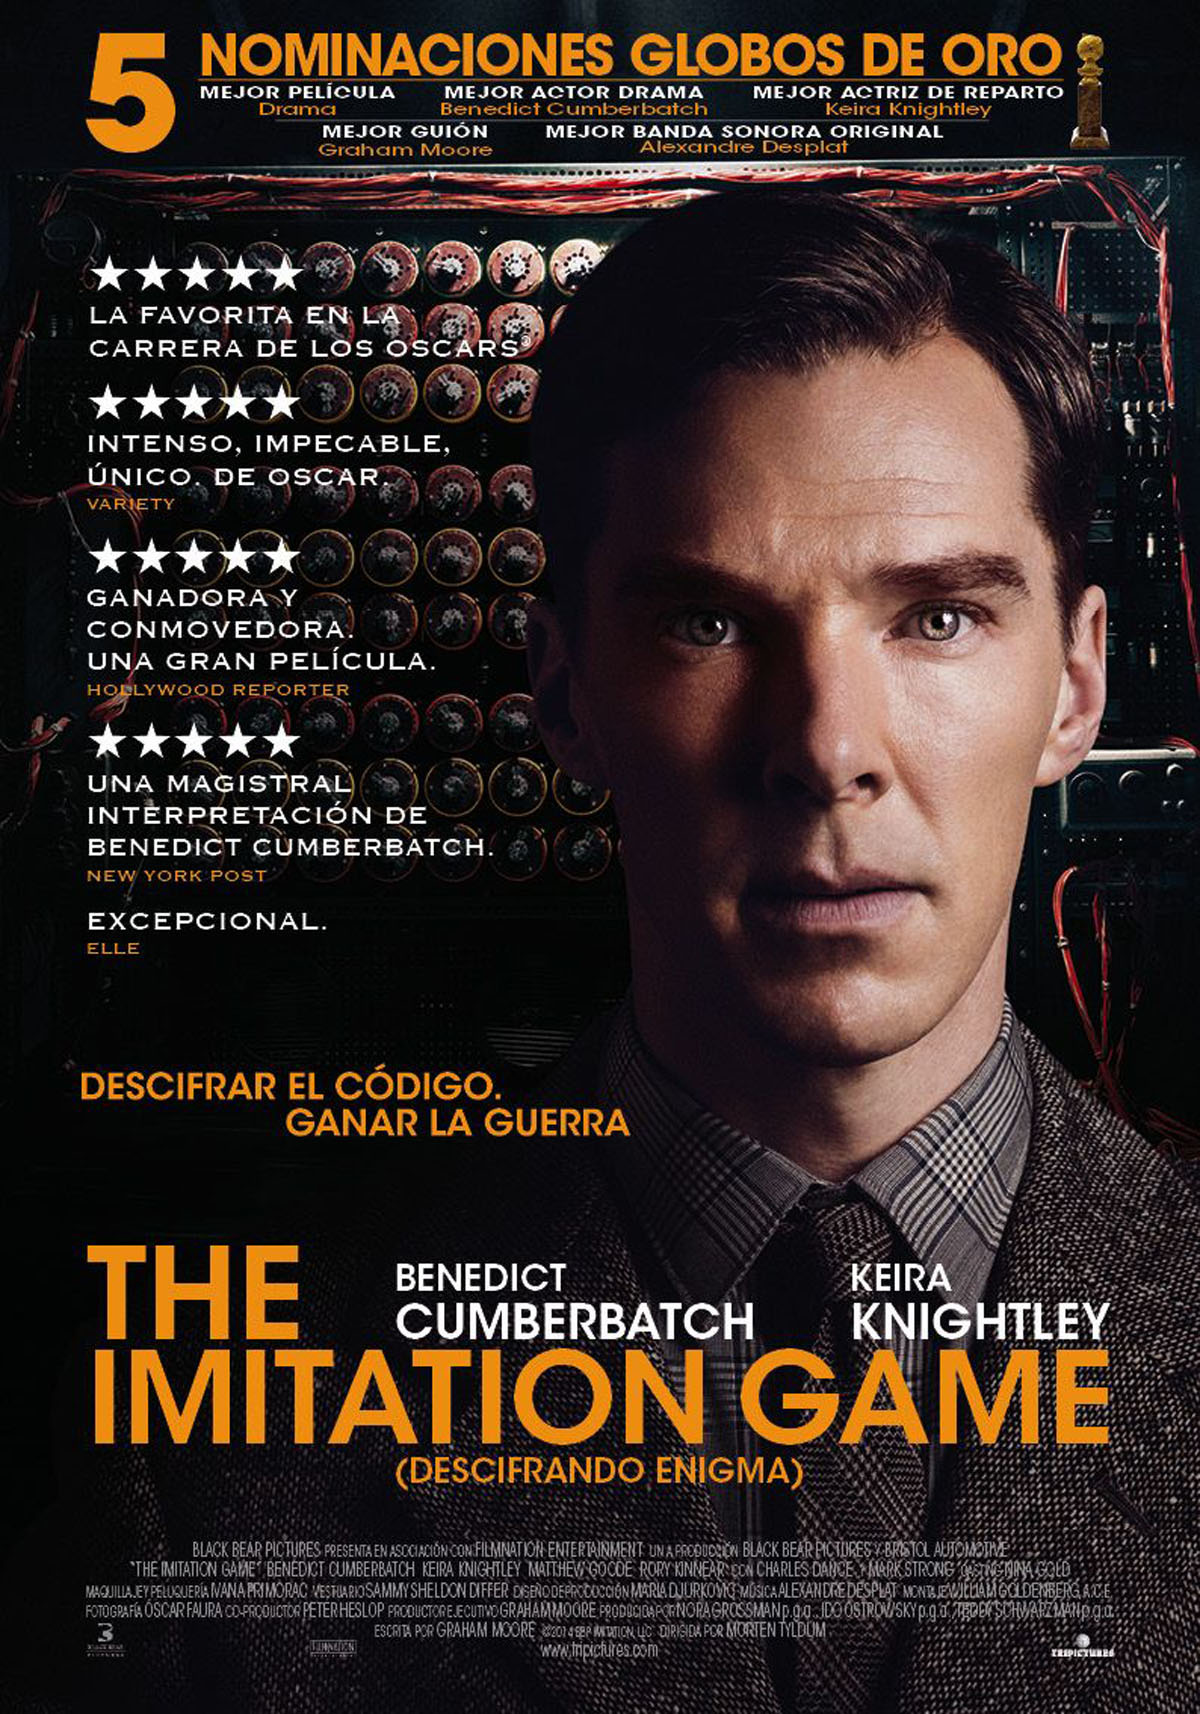

## Arquitectura

* Es una máquina abstracta, sin existencia real, que representa la configuración más sencilla de una computadora
* Turing empezó tratando de modelar a una computadora humana, es decir, a un humano tratando de resolver algorítmicamente un problema utilizando papel y lápiz:

| Abstracción | Modelo básico                       |    |
| --          | --                                  | -- |
| **papel**   | una **cinta**                       | lineal teóricamente infinita que se divide en celdas. Cada celda de la cinta puede contener un solo **símbolo del alfabeto** de la cinta                          |
| **lápiz**   | una **cabeza de lectura/escritura** | que lee un sólo símbolo de la cinta por vez controlado un **conjunto finito de estados** que representan los distintos "estados mentales", y borra un símbolo o lo reemplaza por otro |

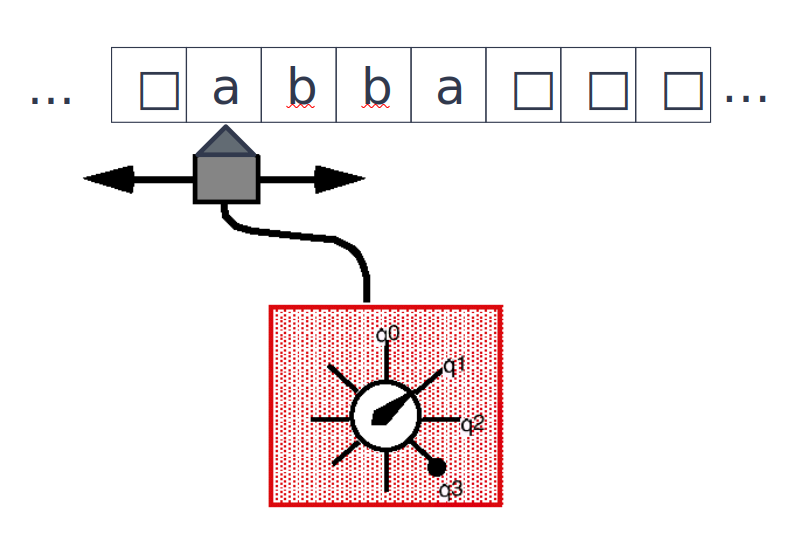

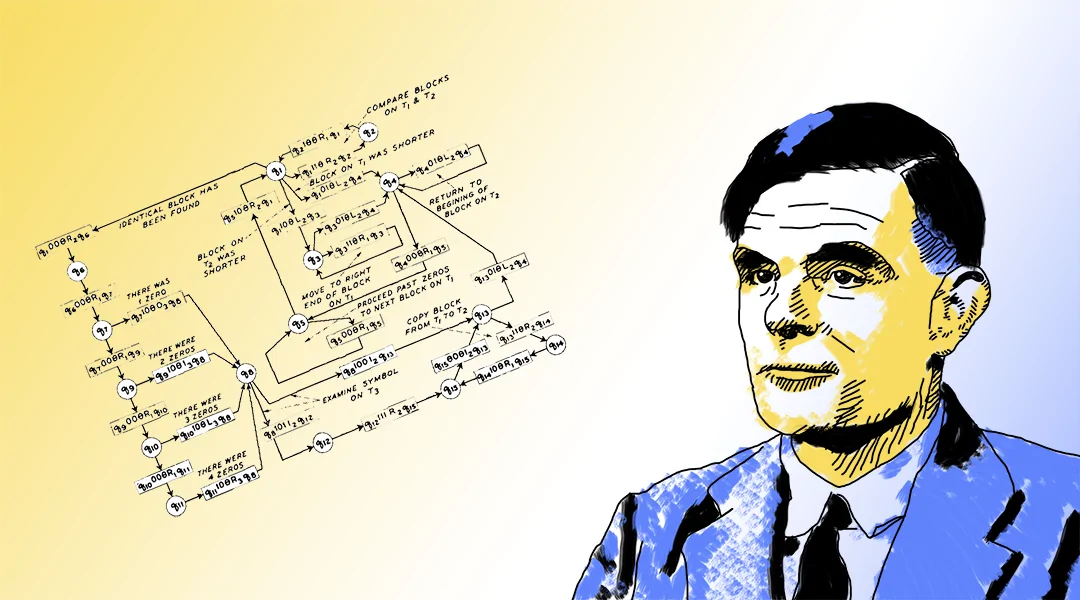

## Definición formal

* Formalmente una MT se define como una 7-upla: $M = <\Gamma, \Sigma, b, Q, q0, F, \delta>$

|          |                                                                                 |
| --       | --                                                                              |
| $\Gamma$ | alfabeto de la cinta, $\Gamma = \Sigma \cup \{b\}  \cup$ símbolos_aux           |
| $\Sigma$ | alfabeto de entrada, $\Sigma ⊂ \Gamma, \Sigma \cap $ símbolos_aux = $\emptyset$ |
| $b$      | símbolo blanco, $b \in \Gamma, b \notin \Sigma$                                 |
| $Q$      | conjunto finito de estados                                                      |
| $q0$     | estado inicial, $q0 \in Q$                                                      |
| $F$      | conjunto de estados finales, $F ⊆ Q$                                            |
| $\delta$ | función de transición de estados, $\delta: Q$ x $\Gamma \rightarrow Q$ x $\Gamma$ x $\{L (Left), R (Right), S (Stay)\}$ |

* Ejemplo de transición: $\delta(q0, X) = (q1, Y, R)$

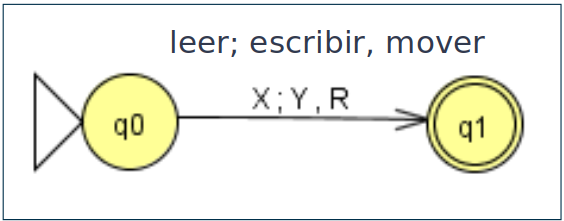

## Características

* La cinta es infinita, por lo que a los dos lados de la información que aparezca en la entrada, habrá espacios en blanco representado por $b$. (otros autores consideran que la cinta tiene una celda de inicio a la izquierda, pero es infinita a derecha)
* Inicialmente contiene un número finito de símbolos de $\Sigma$ (las $n$ posiciones más a la izquierda de la cinta de entrada contiene la palabra de entrada $w$, donde $|w|= n$) precedidos y seguidos de infinitos blancos (símbolo especial $b$, del alfabeto de la cinta)
* Al igual que el resto de los autómatas, se representa por la tabla de transición en la que en las filas están los estados, en las columnas los símbolos de $\Gamma$, y en la posición $(q, a)$ aparece $\delta(q, a)$

## Ejemplo: MT que duplica cantidad de unos

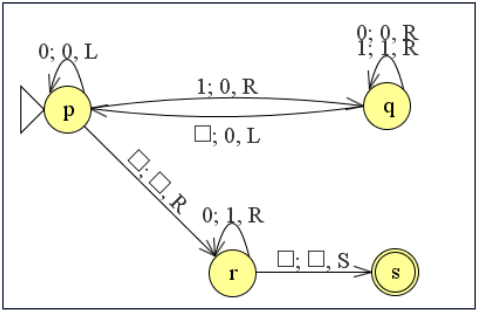

* $MT = <\Gamma = \{0, 1, □\}, \Sigma = \{1\}, b = □, Q = \{p, q, r, s\}, q0 = p, F = \{s\}, \delta>$

| $\delta$ | $1$   | $0$   | $□$   |
| --       | --    | --    | --    |
| >$p$     | $q0R$ | $p0L$ | $r□R$ |
| $q$      | $q1R$ | $q0R$ | $p0L$ |
| $r$      | -     | $r1R$ | $s□S$ |
| *$s$     | -     | -     | -     |

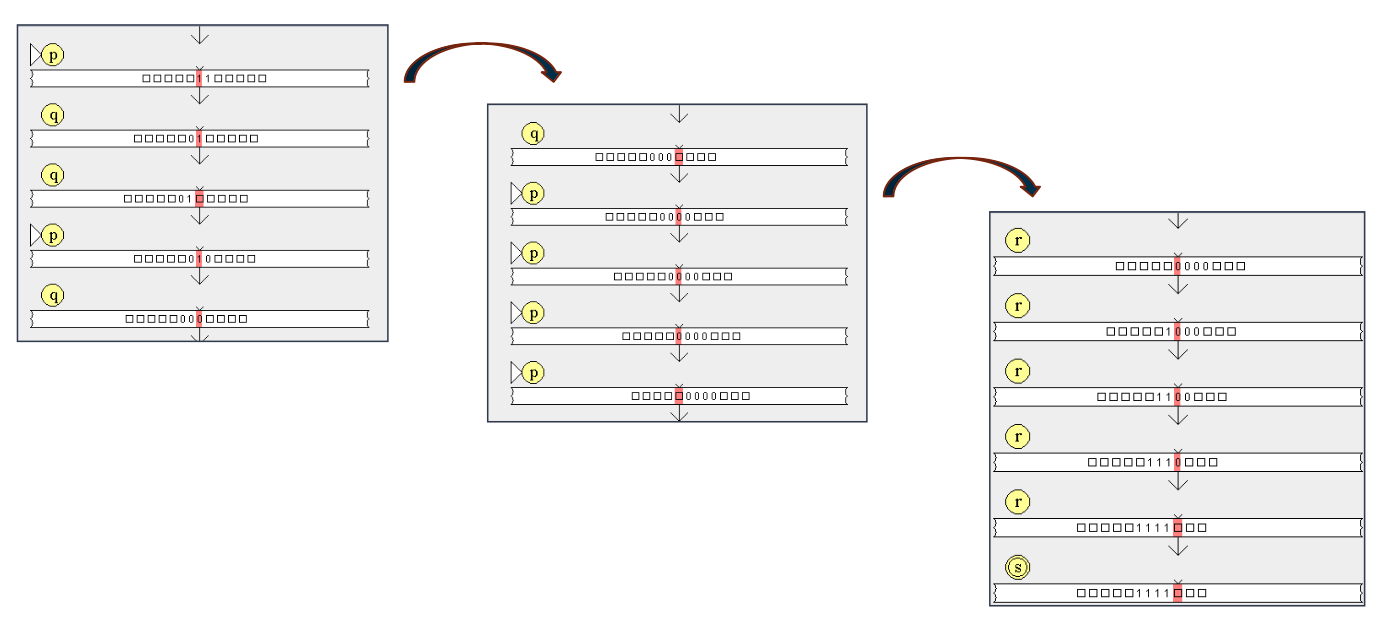

## Descripción instantánea

* Permite describir la configuración de la MT en cada momento
* Notación: $w_1q \sigma w_2$

|          |                     |                                                                                                  |
| --       | --                  | --                                                                                               |
| $w_1$    | $w_1 \in \Gamma^+$  | palabra de la cinta que precede a la celda sobre la que se encuentra la cabeza de entrada/salida |
| $q$      | $q \in Q$           | estado actual                                                                                    |
| $\sigma$ | $\sigma \in \Gamma$ | símbolo de la cinta sobre el que se encuentra la cabeza de entrada/salida                        |
| $w_2$    | $w_2 \in \Gamma^+$  | palabra que hay a continuación de la cabeza de entrada/salida                                    |

* Ejemplo: $11q00$

## Movimientos

* Se denota el paso de una configuración a otra por medio del símbolo: $├$
* Ejemplo: $p11$ ├ $0q1$ ...

## Computación

* Es la secuencia de todos los movimientos que conducen a una configuración de parada
* Ejemplo: $p11$ ├* $1111s□$

## MT que nunca parará

* La MT se moverá por tiempo indefinido con la cabeza de lectura/escritura desplazándose de derecha a izquierda alternativamente. Se dice que la MT se encuentra en un "bucle infinito"
* Computación: $aabq0abb$ ├* $\infty$

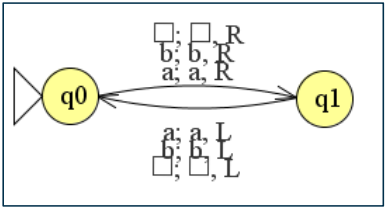

## Lenguaje aceptado por una MT: L(M)

* Una MT se puede comportar como un aceptador de un lenguaje, de la misma forma que lo hace un AF o AP
* Una palabra es reconocida por una MT, si dispuesta inicialmente en la cinta de entrada, con la cabeza de lectura en el primer símbolo de la palabra y la MT en el estado inicial, la máquina es capaz de transitar a un estado final y pararse
* Un lenguaje $L$ es Turing-aceptable si $\exists$ MT que da halt $\forall w \in L$, es decir, la palabra $w$ es aceptada por la MT
* $L(M) = \{w \in \Sigma^* / w_1q \sigma w_2$ ├* $w_1p \sigma w_2 \wedge p \in F \wedge w_i \in \Gamma \}$

* Es el autómata más general, capaz de reconocer las palabras de los lenguajes generados por las gramáticas menos restrictivas
* Ejemplo: $L = \{w / |w|_a = |w|_b = |w|_c\}$

$$S  \rightarrow SABC \mid \lambda$$
$$AB \rightarrow BA$$
$$BA \rightarrow AB$$
$$AC \rightarrow CA$$
$$CA \rightarrow AC$$
$$BC \rightarrow CB$$
$$CB \rightarrow BC$$
$$A  \rightarrow a$$
$$B  \rightarrow b$$
$$C  \rightarrow c$$

* Ejemplo: $L = \{a^nb^nc^n / n ≥ 0\}$

$$S  \rightarrow aBTc \mid abc \mid \lambda$$
$$T  \rightarrow ABTc \mid ABc$$
$$BA \rightarrow BX$$
$$BX \rightarrow YX$$
$$YX \rightarrow AX$$
$$AX \rightarrow AB$$
$$aA \rightarrow aa$$
$$aB \rightarrow ab$$
$$bB \rightarrow bb$$

## Aceptación de palabras por MT

* Una palabra $w \in \Sigma^*$ es aceptada por una MT T si empezando con la configuración inicial correspondiente a la palabra $w$, eventualmente se llega al estado de aceptación **ha**
* No es necesario procesar toda la palabra para aceptarla
* El lenguaje aceptado por T es el conjunto de palabras aceptadas por T

## Rechazo de palabras por MT

* Una palabra $w \in \Sigma^*$ es rechazada por una MT T si empezando con la configuración inicial correspondiente a la palabra $w$, eventualmente se llega al estado de rechazo **hr**
* No es necesario procesar toda la palabra para rechazarla
* Es costumbre omitir el estado de rechazo y rechazar una palabra cuando no existe una transición, es decir, cuando la máquina se queda "colgada"

### Ejemplo: MT que acepta $L = \{aw / w \in \{a, b\}^*\}$

| $\delta$ | $a$   | $b$   | $□$   |
| --       | --    | --    | --    |
| >$q$     | $aaS$ | $rbS$ | $r□S$ |
| *$a$     | -     | -     | -     |
| $r$      | -     | -     | -     |

### Ejemplo: MT que acepta $L = \{wa / w \in \{a, b\}^*\}$

| $\delta$ | $a$   | $b$   | $□$   |
| --       | --    | --    | --    |
| >$p$     | $paR$ | $pbR$ | $q□L$ |
| $q$      | $aaS$ | $rbS$ | $r□S$ |
| *$a$     | -     | -     | -     |
| $r$      | -     | -     | -     |

### Ejemplo: MT que acepta $L = \{0^n1 / n ≥ 0\}$

| $\delta$ | $1$   | $0$   | $□$   |
| --       | --    | --    | --    |
| >$p$     | $q1R$ | $p0R$ | $r□R$ |
| $q$      | $r1S$ | $r0S$ | $a□S$ |
| $r$      | -     | -     | -     |
| *$a$     | -     | -     | -     |

### Ejemplo: MT que acepta $L = \{0^n1^n / n ≥ 1\}$

| $\delta$ | $1$        | $0$        | $x$        | $y$        | $□$        |
| --       | --         | --         | --         | --         | --         |
| >$q0$    | -          | $(q1,x,R)$ | -          | $(q3,y,R)$ | -          |
| $q1$     | $(q2,y,L)$ | $(q1,0,R)$ | -          | $(q1,y,R)$ | -          |
| $q2$     | -          | $(q2,0,L)$ | $(q0,x,R)$ | $(q2,y,L)$ | -          |
| $q3$     | -          | -          | -          | $(q3,y,R)$ | $(q4,□,S)$ |
| *$q4$    | -          | -          | -          | -          | -          |

## Modificaciones de las MT

* Existen otras definiciones de las MT que son equivalentes a la original
* Algunos de esos modelos alternativos son mucho más complicados aunque todos tienen la misma potencia computacional (o de cálculo)
* Muchas de ellas dotan de mayor flexibilidad al diseño de una MT que resuelva un problema particular
* Variaciones:

|                           |                                                                                                |
| --                        | --                                                                                             |
| **MT multipistas**        | cada celda de la cinta se divide en subceldas                                                  |
| **MT multidimensionales** | permite que la cinta tenga muchas dimensiones, $\delta: Q$ x $\Gamma \rightarrow Q$ x $\Gamma$ x $\{L, R, U (up), D (down), S\}$ |
| **MT multicinta**         |                                                                                                |
| **MTND**                  |                                                                                                |

## MT multicinta

* Tiene varias cintas, cada una de las cuales tiene su propia cabeza de lectura/escritura
* Las cabezas de lectura/escritura se controlan al mismo tiempo independientemente:
  * No tienen que moverse en la misma dirección
  * Ni realizar el mismo número de movimientos
  * Ni incluso, hacer nada a la vez
* La función de transición para una MT con $n$ cintas es de la forma: $\delta: Q$ x $\Gamma^n \rightarrow Q$ x $\Gamma^n$ x $\{L, R, S\}^n$ Donde una transición de la forma: $\delta(q, (\sigma_1, \sigma_2, ..., \sigma_n)) = (p, (\tau_1, \tau_2, ..., \tau_n), (X_1, X_2, ..., X_n))$. Significa que cambia del estado $q$ a $p$, reemplaza $\sigma_i$ por $\tau_i$ en la cinta $i$ y mueve la cabeza de la cinta $i$ en la dirección $X_i$
* Las MT multicinta simplifican en gran medida alguna de las actividades que se desearía hacer con la MT original

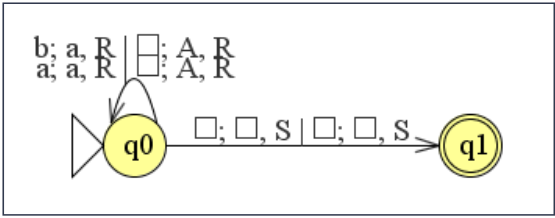

### Ejemplo: MT multicinta (bicinta) que acepta $L = \{a^nb^n / n ≥ 1\}$

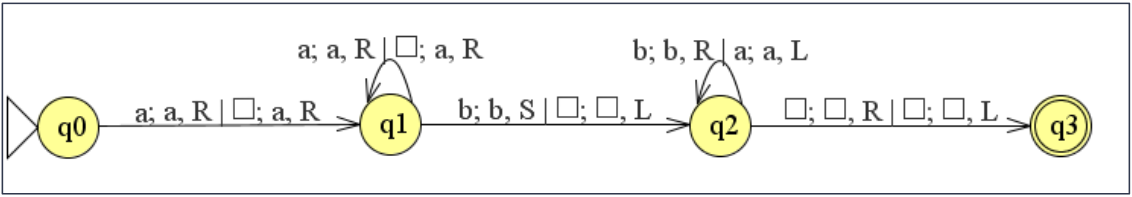

$$MT = <\{a, b, □\}, \{a, b\}, □, \{q0, q1, q2, q3\}, q0, \{q3\}, \delta>$$

| $\delta$ | C1  | C2  | C1:new | C1:mov | C2:new | C2:mov | Qdest |
| --       | --  | --  | --     | --     | --     | --     | --    |
| $q0$     | $a$ | $□$ | $a$    | $R$    | $a$    | $R$    | $q1$  |
| $q1$     | $a$ | $□$ | $a$    | $R$    | $a$    | $R$    | $q1$  |
| $q1$     | $b$ | $□$ | $b$    | $S$    | $□$    | $L$    | $q2$  |
| $q2$     | $b$ | $a$ | $b$    | $R$    | $a$    | $L$    | $q2$  |
| $q2$     | $□$ | $□$ | $□$    | $R$    | $□$    | $L$    | $q3$  |

### Ejemplo: MT multicinta (bicinta) que acepta $L = \{a^nb^nc^n / n ≥ 1\}$

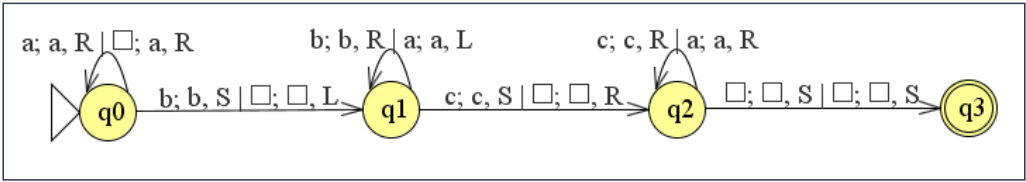

$$MT = <\{a, b, □\}, \{a, b\}, □, \{q0, q1, q2, q3\}, q0, \{q3\}, \delta>$$

| $\delta$ | C1  | C2  | C1:new | C1:mov | C2:new | C2:mov | Qdest |
| --       | --  | --  | --     | --     | --     | --     | --    |
| $q0$     | $a$ | $□$ | $a$    | $R$    | $a$    | $R$    | $q0$  |
| $q0$     | $b$ | $□$ | $b$    | $S$    | $□$    | $L$    | $q1$  |
| $q1$     | $b$ | $a$ | $b$    | $R$    | $a$    | $L$    | $q1$  |
| $q1$     | $c$ | $□$ | $c$    | $S$    | $□$    | $R$    | $q2$  |
| $q2$     | $c$ | $a$ | $c$    | $R$    | $a$    | $R$    | $q2$  |
| $q2$     | $□$ | $□$ | $□$    | $S$    | $□$    | $S$    | $q3$  |

## MTND

* Se elimina el requerimiento de que la regla de transición sea una función. Para un estado actual y el símbolo actual de la cinta, puede haber un número finito de movimientos a elegir (la MT proporciona alternativas a la ejecución)
* Por tanto, la regla de transición, $\Delta$, de dicha máquina, satisface: $\Delta(q, \sigma) \subseteq Q$ x $\Gamma$ x $\{L, R, S\}$
* Por ejemplo, si la MT tiene una transición $\Delta(q1, a) = \{(q1, b, R), (q2, a, L)\}$, entonces los movimientos posibles son:
  * $abbq1ab$ ├ $abbbq1b$
  * $abbq1ab$ ├ $abq2bab$
* Ejemplo:

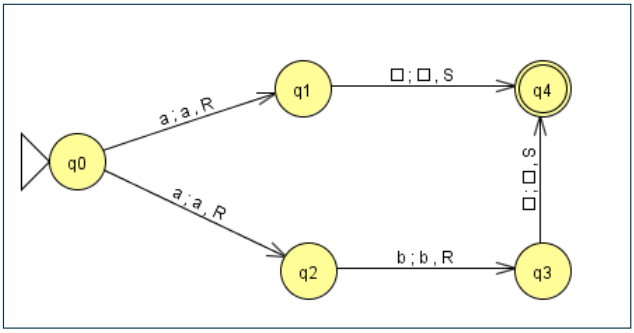

* $\Delta(q0, a) = \{(q1, a, R), (q2, a, R)\}$
* Puede verse, que dependiendo del camino de análisis escogido, en algunos casos se acepta una palabra de entrada y en otros se rechaza
* En las MTND se considera que una palabra es aceptada si existe al menos una forma de analizarla en la que la máquina la acepte
* Inversamente una palabra será rechazada si queda rechazada por todas las formas posibles de analizarla
* El lenguaje L(N) aceptado por una MTND N es el conjunto de palabras para las que existe al menos un camino que conduce la máquina a pararse en un estado final
* $\forall$ MTND, $\exists$ una MT D equivalente, y viceversa
* Las MTD son un caso particular de las MTND
* Por tanto, no se gana ninguna potencia adicional a causa del no determinismo